# Working with audio


## Exploring audio characteristics

We use librosa, a common library to work with audio, to manipulate audio

In [2]:
import librosa

array, sampling_rate = librosa.load(librosa.ex("trumpet"))
print(sampling_rate)

22050


### Time domain

Exploring the audio in time domain

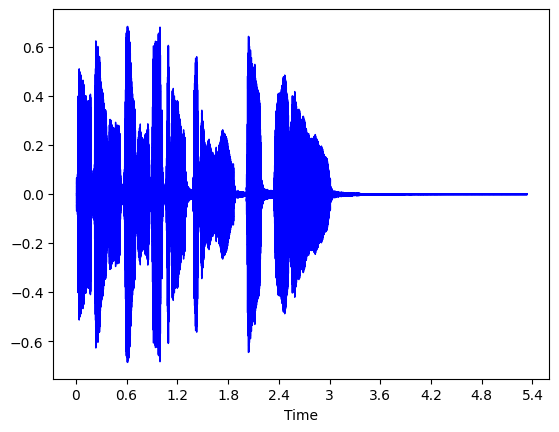

In [7]:
import matplotlib.pyplot as plt
import librosa.display

# plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate, color='blue')

### Frequency spectrum

The frequency spectrum is another way to represent the audio. Lets do a DFT (discrete fourier transform) of the first 4096 samples. Apparently, we can do it for the whole audio file but its more insightful to do them for a small region.

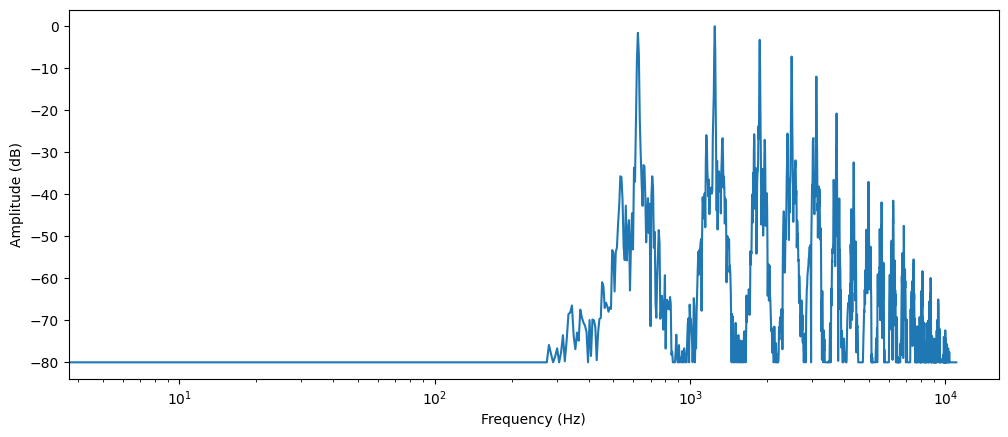

In [9]:
import numpy as np

dft_input = array[:4096]

# Calculate the DFT of the input
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# Get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# Frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")
